# Red Wine Quality Prediction Project

## Import Packages

In [10]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

## Import Dataset

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analysis

In [3]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
data.shape

(1338, 7)

In [5]:
data.duplicated().sum()

1

In [6]:
data.drop_duplicates(inplace=True)
data.shape

(1337, 7)

## Adding Extra Columns

In [12]:
data.loc[data['quality'] >= 7,'Remark'] = 1
data.loc[data['quality'] < 7,'Remark'] = 0

In [13]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Remark
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0.0


## Null values

In [123]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Remark                  0
dtype: int64

## Checking Skewness

In [124]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Remark
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252,0.135394
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578,0.342270
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


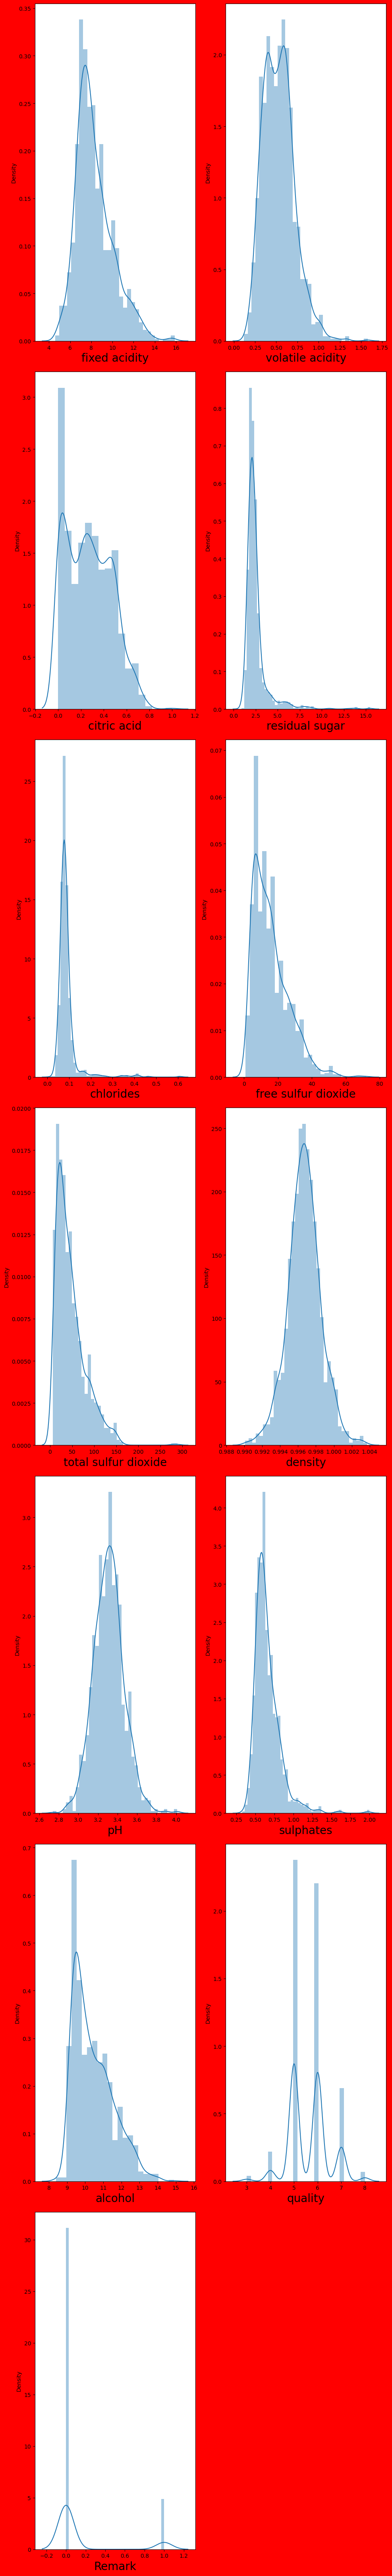

In [125]:
plt.figure(figsize=(10,65), facecolor='red')
plotnumber = 1

for column in data:                       
    if plotnumber<=13:                    
        ax = plt.subplot(7,2,plotnumber)    
        sns.distplot(data[column])       
        plt.xlabel(column, fontsize=20)   

    plotnumber+=1  
plt.tight_layout()   

## Checking Outliners

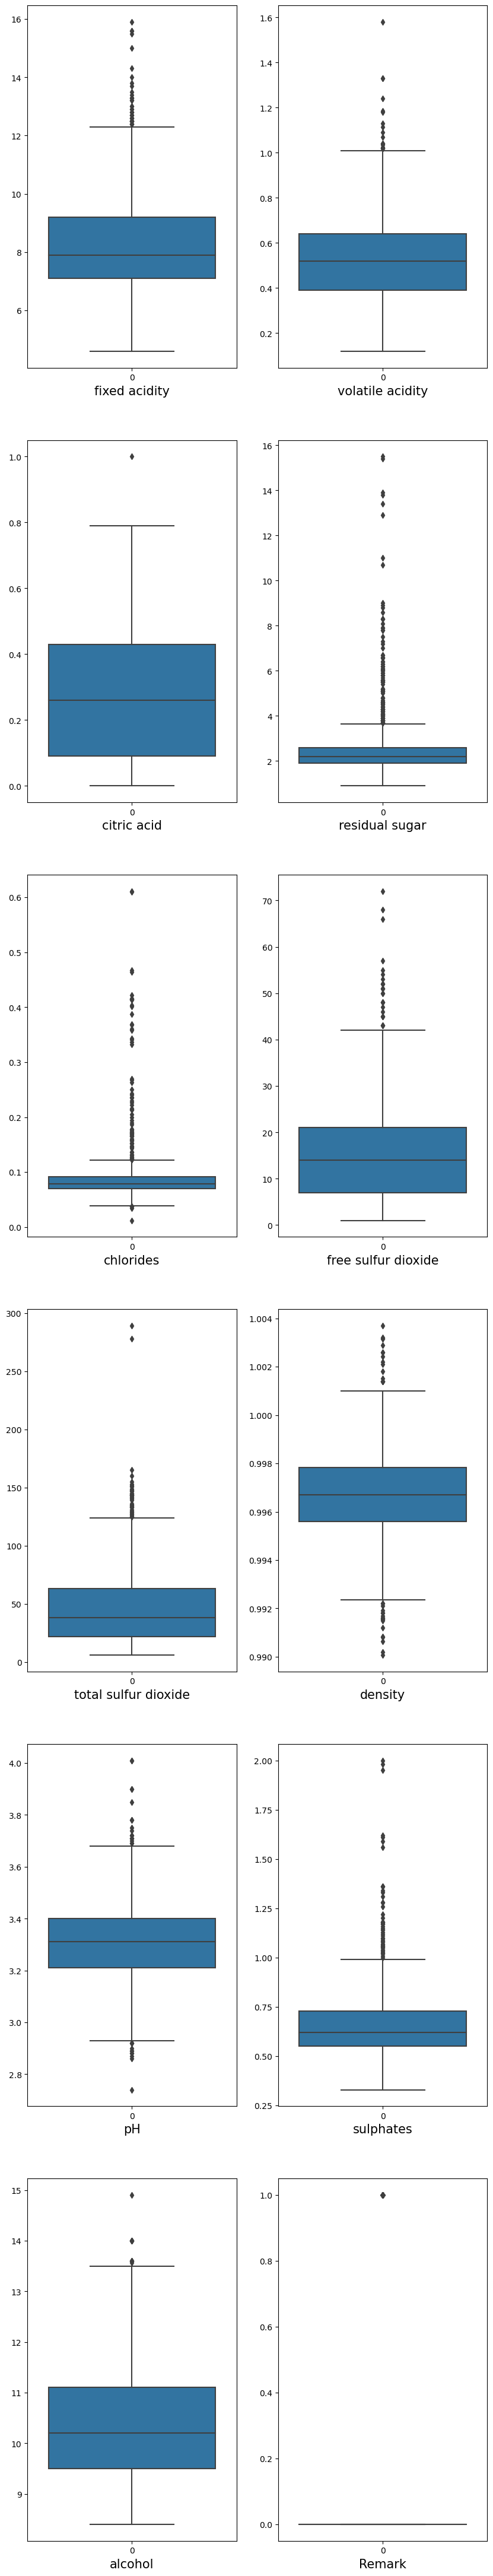

In [126]:

df_features = data.drop('quality',axis=1)

plt.figure(figsize=(10,65))
graph = 1

for column in df_features:  
    if graph<=13:
        plt.subplot(7,2, graph)
        ax=sns.boxplot(data= df_features [column])
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

## Removing Outliners & Skewness

In [127]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Remark'],
      dtype='object')

In [128]:
from scipy.stats import zscore 

z_score = zscore (data[['fixed acidity', 'volatile acidity', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates']])
abs_z_score = np.abs(z_score) 

filtering_entry = (abs_z_score < 2).all(axis=1)
data = data[filtering_entry]

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Remark
count,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,8.161389,0.517237,0.251553,2.290194,0.080819,14.540347,40.772217,0.996582,3.320123,0.632268,10.380797,5.645557,0.125638
std,1.369482,0.158524,0.180194,0.636782,0.018800,8.365326,24.955302,0.001470,0.123737,0.115655,0.993405,0.770101,0.331611
min,5.200000,0.180000,0.000000,1.200000,0.038000,1.000000,6.000000,0.993060,3.010000,0.330000,8.500000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.230000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.240000,2.200000,0.079000,13.000000,35.000000,0.996600,3.320000,0.610000,10.100000,6.000000,0.000000
75%,9.000000,0.630000,0.400000,2.500000,0.089000,20.000000,54.000000,0.997490,3.400000,0.700000,11.100000,6.000000,0.000000
max,11.700000,0.895000,0.740000,5.200000,0.186000,36.000000,113.000000,1.000400,3.610000,0.990000,14.000000,8.000000,1.000000


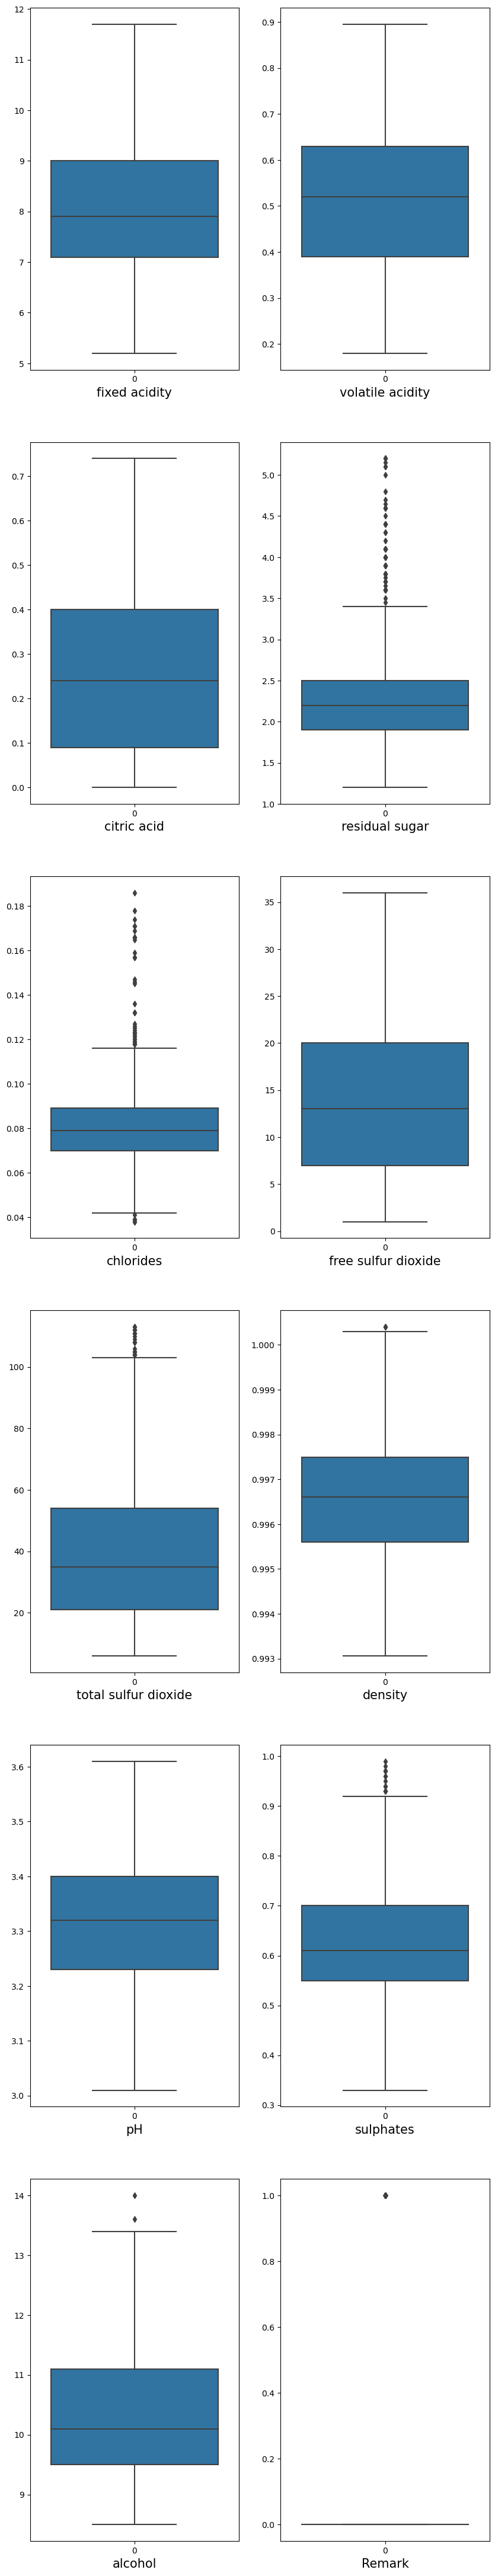

In [129]:
df_features = data.drop('quality',axis=1)

plt.figure(figsize=(10,65))
graph = 1

for column in df_features:        
    if graph<=13:
        plt.subplot(7,2, graph)
        ax=sns.boxplot(data= df_features [column])   
        plt.xlabel(column, fontsize=15)
    
    graph+=1
plt.show()

In [130]:
data.shape

(979, 13)

## Checking Multicollinearity

In [131]:
corr = data.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Remark
fixed acidity,1.000000,-0.291551,0.653166,0.175013,0.167688,-0.130298,-0.074929,0.548135,-0.664617,0.234758,0.080943,0.162688,0.157267
volatile acidity,-0.291551,1.000000,-0.638125,0.078053,0.141946,0.016008,0.106705,0.094146,0.231062,-0.326630,-0.260345,-0.351306,-0.270369
citric acid,0.653166,-0.638125,1.000000,0.137523,0.056102,-0.085951,-0.017393,0.233634,-0.447928,0.315092,0.248867,0.267758,0.239375
residual sugar,0.175013,0.078053,0.137523,1.000000,0.172492,0.023204,0.096513,0.317533,-0.065453,0.020704,0.179850,0.054207,0.072662
chlorides,0.167688,0.141946,0.056102,0.172492,1.000000,0.023618,0.159434,0.330138,-0.145761,-0.005642,-0.194084,-0.162417,-0.131990
free sulfur dioxide,-0.130298,0.016008,-0.085951,0.023204,0.023618,1.000000,0.650104,0.010536,0.109505,0.039146,-0.090642,-0.052774,-0.084210
total sulfur dioxide,-0.074929,0.106705,-0.017393,0.096513,0.159434,0.650104,1.000000,0.198764,-0.033223,-0.099151,-0.326511,-0.216971,-0.205227
density,0.548135,0.094146,0.233634,0.317533,0.330138,0.010536,0.198764,1.000000,-0.181457,0.084883,-0.489400,-0.205740,-0.192208
pH,-0.664617,0.231062,-0.447928,-0.065453,-0.145761,0.109505,-0.033223,-0.181457,1.000000,-0.026449,0.052915,-0.092039,-0.101049
sulphates,0.234758,-0.326630,0.315092,0.020704,-0.005642,0.039146,-0.099151,0.084883,-0.026449,1.000000,0.289890,0.425765,0.315689


In [132]:
corr['quality']

fixed acidity           0.162688
volatile acidity       -0.351306
citric acid             0.267758
residual sugar          0.054207
chlorides              -0.162417
free sulfur dioxide    -0.052774
total sulfur dioxide   -0.216971
density                -0.205740
pH                     -0.092039
sulphates               0.425765
alcohol                 0.519167
quality                 1.000000
Remark                  0.703074
Name: quality, dtype: float64

In [133]:
x = data.drop(columns = ['quality'])
y = data['quality']


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = x.columns
vif["VIF"] = [variance_inflation_factor (x.values, i) for i in range(x.shape[1])]
vif

,variables,VIF
0,fixed acidity,107.843298
1,volatile acidity,23.879746
2,citric acid,9.144680
3,residual sugar,16.415396
4,chlorides,22.672796
5,free sulfur dioxide,7.763748
6,total sulfur dioxide,8.206560
7,density,1997.525437
8,pH,1460.916539
9,sulphates,40.571509


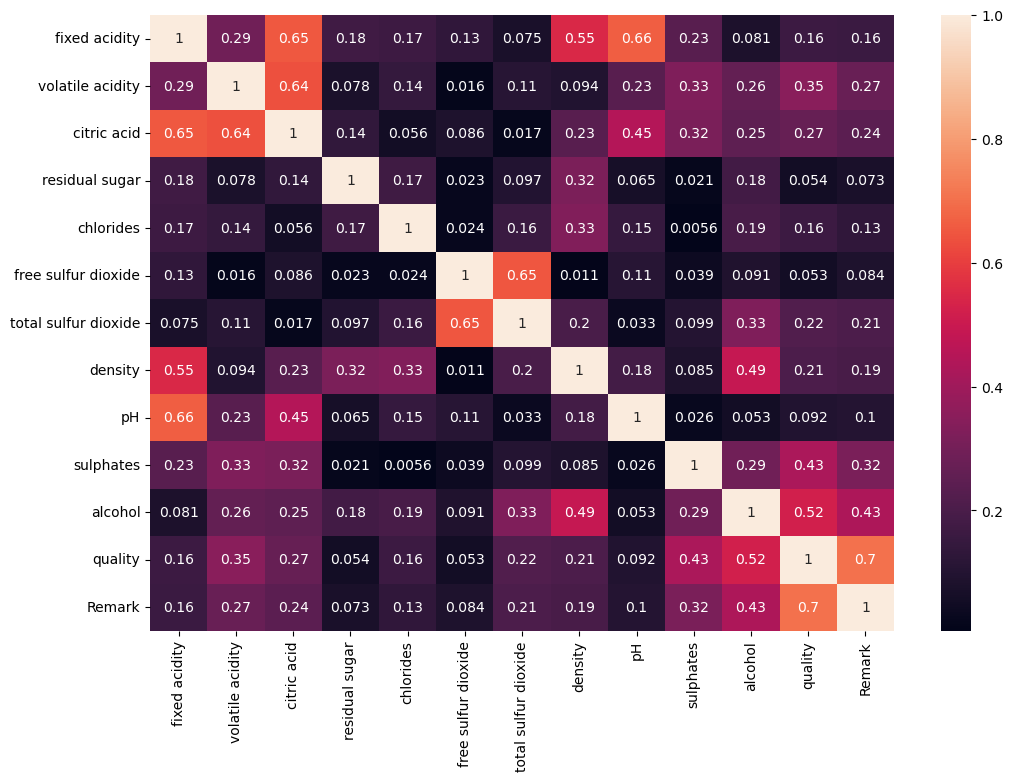

In [134]:
df_corr = data.corr().abs ()

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, annot_kws={'size' :10})
plt.show()

## Separating Features & Labels

In [135]:
Features = data.drop(columns=['quality'],axis=1)
Label = data.quality

## Standardizing Features

In [136]:
scaler = StandardScaler()
Features_scaled = scaler.fit_transform(Features)

In [137]:
Features_scaled

array([[-0.55625288,  1.15349372, -1.39672121, ..., -0.62517545,
        -0.9878123 , -0.37906673],
       [-0.26402236,  2.28954886, -1.39672121, ...,  0.41292507,
        -0.58495113, -0.37906673],
       [-0.26402236,  1.53217877, -1.17462513, ...,  0.15339994,
        -0.58495113, -0.37906673],
       ...,
       [-1.43294442,  0.52235199, -0.95252904, ..., -0.45215869,
         0.12005592, -0.37906673],
       [-1.65211731,  0.80636577, -0.73043296, ...,  0.6724502 ,
        -0.18208996, -0.37906673],
       [-1.57905968, -1.30795906,  1.21290778, ...,  0.23990832,
         0.62363238, -0.37906673]])

## Test - Train Split

In [138]:
x_train,x_test,y_train,y_test = train_test_split(Features_scaled, Label, test_size = 0.25, random_state=348)

# Logistic Regression

### Creating Logistic Regression model

In [139]:
from sklearn.linear_model import LogisticRegression
cls_reg = LogisticRegression()

In [140]:
cls_reg.fit(x_train, y_train)

LogisticRegression()

In [141]:
cls_reg.coef_

array([[-0.19494948,  0.57544649, -0.28042513, -0.39716651,  0.03260965,
        -0.44243341, -0.43592787, -0.06770154,  0.70681448,  0.17998137,
        -0.32841086, -0.09005244],
       [ 0.42641372,  0.22184087,  0.04794813,  0.40300734,  0.14866776,
         0.02517897, -0.16191426, -0.38427941,  0.36509081, -0.88966339,
        -0.52770436, -0.49734441],
       [-0.19454872,  0.03007564,  0.11618859, -0.11286317,  0.03900786,
         0.09753217,  0.47788104,  0.2562346 , -0.34089398, -0.28084275,
        -0.41305576, -1.14403789],
       [-0.23257182, -0.43836231, -0.15418927, -0.06937027, -0.06356245,
         0.14150183,  0.26206761,  0.37964349, -0.47237864,  0.36237233,
         0.57404625, -1.64547324],
       [ 0.37112022, -0.401452  , -0.09389868,  0.16839873, -0.02046108,
        -0.15143186,  0.3302777 , -0.34588297,  0.03522577,  0.36623682,
        -0.2351754 ,  2.17853034],
       [-0.17546393,  0.01245131,  0.36437637,  0.00799388, -0.13626174,
         0.32965229, -

In [142]:
cls_reg.intercept_

array([-3.60791265,  0.53317487,  3.38680733,  3.47697862, -1.14826453,
       -2.64078365])

In [143]:
print('Accuracy Score:',cls_reg.score(x_train, y_train))

Accuracy Score: 0.7043596730245232


In [144]:
cls_reg.predict([[6,0.21,0.5,3.2,0.067,18,43,0.99,4,0.6,11,0]])

array([6], dtype=int64)

In [145]:
y_pred = cls_reg.predict(x_test)
y_pred

array([7, 5, 7, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6,
       5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 7, 7, 6,
       5, 6, 6, 6, 5, 5, 6, 6, 7, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 6, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 7, 5, 6, 5, 7, 6, 6, 5, 5,
       5, 7, 6, 5, 5, 6, 5, 5, 7, 6, 5, 6, 4, 5, 6, 6, 7, 5, 6, 5, 7, 6,
       7, 5, 5, 5, 6, 6, 6, 6, 6, 7, 4, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       5, 6, 5, 7, 6, 5, 6, 7, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 7, 7, 6, 5,
       6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 7, 6,
       6, 5, 6, 7, 5, 6, 5, 6, 5, 7, 5, 6, 5, 5, 4, 5, 5, 5, 5, 7, 7, 6,
       6, 5, 6, 7, 6, 5, 6, 7, 6, 5, 6, 5, 6, 6, 5, 5, 7, 5, 5, 5, 6, 7,
       5, 7, 5, 6, 6, 7, 7, 7, 5, 6, 5, 6, 6, 5, 7, 5, 7, 5, 6, 5, 6, 5,
       6, 6, 6], dtype=int64)

In [146]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  7,  0,  0,  0],
       [ 0,  3, 74, 25,  0,  0],
       [ 0,  0, 32, 68,  0,  0],
       [ 0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  2,  0]], dtype=int64)

In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.65      0.73      0.69       102
           6       0.72      0.68      0.70       100
           7       0.94      1.00      0.97        33
           8       0.00      0.00      0.00         2

    accuracy                           0.71       245
   macro avg       0.39      0.40      0.39       245
weighted avg       0.69      0.71      0.70       245



# DecisionTreeClassifier

## Creating DecisionTreeClassifier model

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
cls_dec = DecisionTreeClassifier(criterion='gini',min_samples_leaf= 1, min_samples_split=2,max_depth=16)

In [150]:
cls_dec.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=16)

In [151]:
print('Accuracy Score:',cls_dec.score(x_train, y_train))

Accuracy Score: 0.9986376021798365


In [152]:
cls_dec.predict([[6,0.21,0.5,3.2,0.067,18,43,0.99,4,0.6,11,0]])

array([6], dtype=int64)

In [153]:
y_pred = cls_dec.predict(x_test)
y_pred

array([7, 5, 7, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5,
       6, 4, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 6, 6, 5, 7, 8, 6,
       5, 6, 5, 6, 6, 5, 6, 6, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 6, 4, 7, 7, 5, 5, 8, 5, 5, 5, 8, 6, 6, 5, 5,
       6, 7, 6, 6, 5, 5, 6, 5, 7, 5, 6, 6, 4, 6, 6, 6, 7, 6, 6, 5, 7, 6,
       7, 5, 6, 5, 6, 6, 6, 6, 5, 7, 4, 5, 6, 6, 4, 6, 4, 6, 5, 5, 6, 5,
       5, 5, 5, 7, 6, 6, 5, 7, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 7, 7, 6, 5,
       6, 5, 5, 5, 6, 5, 5, 8, 4, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 7, 6,
       6, 5, 6, 7, 5, 6, 5, 5, 6, 8, 5, 6, 5, 6, 4, 5, 6, 5, 6, 8, 7, 5,
       5, 4, 6, 7, 6, 5, 6, 7, 5, 4, 6, 6, 6, 6, 5, 5, 7, 6, 6, 5, 5, 8,
       6, 7, 6, 6, 5, 8, 7, 7, 6, 6, 6, 6, 6, 6, 7, 6, 7, 5, 6, 5, 6, 5,
       5, 6, 6], dtype=int64)

In [154]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 0,  0,  0,  1,  0,  0],
       [ 0,  1,  3,  3,  0,  0],
       [ 0,  9, 55, 38,  0,  0],
       [ 0,  2, 43, 55,  0,  0],
       [ 0,  0,  0,  0, 25,  8],
       [ 0,  0,  0,  0,  2,  0]], dtype=int64)

In [155]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.08      0.14      0.11         7
           5       0.54      0.54      0.54       102
           6       0.57      0.55      0.56       100
           7       0.93      0.76      0.83        33
           8       0.00      0.00      0.00         2

    accuracy                           0.56       245
   macro avg       0.35      0.33      0.34       245
weighted avg       0.59      0.56      0.57       245



# Random Forest Classifier

## Creating Random Forest Classifier model

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [3, 6, 9],
              'max_leaf_nodes': [3, 6, 9]
             }
gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid)
gridsearch.fit(Features_scaled, Label)
gridsearch.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': 9,
 'n_estimators': 150}

In [158]:
cls_rf = RandomForestClassifier(n_estimators=450,criterion='gini',min_samples_split=3,max_depth=14)

In [159]:
cls_rf.fit(Features_scaled, Label)

RandomForestClassifier(max_depth=14, min_samples_split=3, n_estimators=450)

In [160]:
print('Accuracy Score:',cls_rf.score(Features_scaled,Label))

Accuracy Score: 1.0


In [161]:
cls_rf.predict([[6,0.21,0.5,3.2,0.067,18,43,0.99,4,0.6,11,0]])

array([6], dtype=int64)

In [162]:
y_pred = cls_rf.predict(x_test)
y_pred

array([7, 6, 7, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6,
       5, 5, 6, 4, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 7, 7, 6,
       5, 6, 6, 6, 5, 5, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       5, 6, 5, 5, 5, 6, 4, 4, 5, 7, 7, 6, 5, 7, 5, 6, 5, 7, 6, 6, 6, 5,
       5, 7, 6, 5, 5, 6, 6, 5, 7, 6, 4, 6, 5, 6, 6, 6, 7, 5, 6, 6, 7, 6,
       7, 5, 5, 4, 6, 6, 5, 6, 5, 7, 5, 5, 5, 6, 4, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 7, 5, 5, 5, 8, 5, 6, 4, 5, 5, 6, 6, 6, 6, 5, 7, 7, 6, 5,
       6, 6, 6, 5, 6, 5, 6, 7, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 7, 6,
       6, 5, 6, 7, 5, 6, 5, 6, 5, 7, 6, 5, 6, 6, 5, 5, 5, 5, 5, 7, 7, 5,
       6, 5, 5, 7, 6, 5, 5, 7, 6, 5, 6, 5, 6, 6, 5, 5, 7, 5, 6, 5, 5, 7,
       6, 7, 5, 5, 6, 7, 7, 8, 5, 6, 5, 5, 6, 5, 7, 6, 7, 5, 6, 5, 3, 6,
       6, 6, 6], dtype=int64)

In [163]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[  1,   0,   0,   0,   0,   0],
       [  0,   7,   0,   0,   0,   0],
       [  0,   0, 102,   0,   0,   0],
       [  0,   0,   0, 100,   0,   0],
       [  0,   0,   0,   0,  33,   0],
       [  0,   0,   0,   0,   0,   2]], dtype=int64)

In [164]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00       100
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00         2

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245



# KNeighbors Classifier

## Creating KNeighborsClassifier Model

In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [166]:
cls_KN = KNeighborsClassifier(n_neighbors=3, leaf_size=25, p = 1, algorithm='auto', weights = 'distance')

In [167]:
cls_KN.fit(Features_scaled, Label)

KNeighborsClassifier(leaf_size=25, n_neighbors=3, p=1, weights='distance')

In [168]:
print('Accuracy Score:',cls_KN.score(Features_scaled,Label))

Accuracy Score: 1.0


In [169]:
cls_KN.predict([[6,0.21,0.5,3.2,0.067,18,43,0.99,4,0.6,11,0]])

array([6], dtype=int64)

In [170]:
y_pred = cls_KN.predict(x_test)
y_pred

array([7, 6, 7, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6,
       5, 5, 6, 4, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 7, 7, 6,
       5, 6, 6, 6, 5, 5, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       5, 6, 5, 5, 5, 6, 4, 4, 5, 7, 7, 6, 5, 7, 5, 6, 5, 7, 6, 6, 6, 5,
       5, 7, 6, 5, 5, 6, 6, 5, 7, 6, 4, 6, 5, 6, 6, 6, 7, 5, 6, 6, 7, 6,
       7, 5, 5, 4, 6, 6, 5, 6, 5, 7, 5, 5, 5, 6, 4, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 7, 5, 5, 5, 8, 5, 6, 4, 5, 5, 6, 6, 6, 6, 5, 7, 7, 6, 5,
       6, 6, 6, 5, 6, 5, 6, 7, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 7, 6,
       6, 5, 6, 7, 5, 6, 5, 6, 5, 7, 6, 5, 6, 6, 5, 5, 5, 5, 5, 7, 7, 5,
       6, 5, 5, 7, 6, 5, 5, 7, 6, 5, 6, 5, 6, 6, 5, 5, 7, 5, 6, 5, 5, 7,
       6, 7, 5, 5, 6, 7, 7, 8, 5, 6, 5, 5, 6, 5, 7, 6, 7, 5, 6, 5, 3, 6,
       6, 6, 6], dtype=int64)

In [171]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[  1,   0,   0,   0,   0,   0],
       [  0,   7,   0,   0,   0,   0],
       [  0,   0, 102,   0,   0,   0],
       [  0,   0,   0, 100,   0,   0],
       [  0,   0,   0,   0,  33,   0],
       [  0,   0,   0,   0,   0,   2]], dtype=int64)

In [172]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00       100
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00         2

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245



# Support Vector Classifier

## Creating Support Vector Classifier model

In [173]:
from sklearn.svm import SVC

In [174]:
cls_SVC = SVC(kernel='rbf',C=695, gamma=1)

In [175]:
cls_SVC.fit(Features_scaled, Label)

SVC(C=695, gamma=1)

In [176]:
print('Accuracy Score:',cls_SVC.score(Features_scaled,Label))

Accuracy Score: 1.0


In [177]:
cls_SVC.predict([[6,0.21,0.5,3.2,0.067,18,43,0.99,4,0.6,11,0]])

array([6], dtype=int64)

In [178]:
y_pred = cls_SVC.predict(x_test)
y_pred

array([7, 6, 7, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6,
       5, 5, 6, 4, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 7, 7, 6,
       5, 6, 6, 6, 5, 5, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       5, 6, 5, 5, 5, 6, 4, 4, 5, 7, 7, 6, 5, 7, 5, 6, 5, 7, 6, 6, 6, 5,
       5, 7, 6, 5, 5, 6, 6, 5, 7, 6, 4, 6, 5, 6, 6, 6, 7, 5, 6, 6, 7, 6,
       7, 5, 5, 4, 6, 6, 5, 6, 5, 7, 5, 5, 5, 6, 4, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 7, 5, 5, 5, 8, 5, 6, 4, 5, 5, 6, 6, 6, 6, 5, 7, 7, 6, 5,
       6, 6, 6, 5, 6, 5, 6, 7, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 7, 6,
       6, 5, 6, 7, 5, 6, 5, 6, 5, 7, 6, 5, 6, 6, 5, 5, 5, 5, 5, 7, 7, 5,
       6, 5, 5, 7, 6, 5, 5, 7, 6, 5, 6, 5, 6, 6, 5, 5, 7, 5, 6, 5, 5, 7,
       6, 7, 5, 5, 6, 7, 7, 8, 5, 6, 5, 5, 6, 5, 7, 6, 7, 5, 6, 5, 3, 6,
       6, 6, 6], dtype=int64)

In [179]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[  1,   0,   0,   0,   0,   0],
       [  0,   7,   0,   0,   0,   0],
       [  0,   0, 102,   0,   0,   0],
       [  0,   0,   0, 100,   0,   0],
       [  0,   0,   0,   0,  33,   0],
       [  0,   0,   0,   0,   0,   2]], dtype=int64)

In [180]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00       100
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00         2

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245



# Gradient Boosting Classifier

## Creating Gradient Boosting Classifier model

In [181]:
from sklearn.ensemble import GradientBoostingClassifier
cls_gb = GradientBoostingClassifier(learning_rate=1)

In [182]:
cls_gb.fit(Features_scaled, Label)

GradientBoostingClassifier(learning_rate=1)

In [183]:
print('Accuracy Score:',cls_gb.score(Features_scaled,Label))

Accuracy Score: 0.9989785495403473


In [184]:
cls_gb.predict([[6,0.21,0.5,3.2,0.067,18,43,0.99,4,0.6,11,0]])

array([6], dtype=int64)

In [185]:
y_pred = cls_gb.predict(x_test)
y_pred

array([7, 6, 7, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6,
       5, 5, 6, 4, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 6, 7, 7, 6,
       5, 6, 6, 6, 5, 5, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       5, 6, 5, 5, 5, 6, 4, 4, 5, 7, 7, 6, 5, 7, 5, 6, 5, 7, 6, 6, 6, 5,
       5, 7, 6, 5, 5, 6, 6, 5, 7, 6, 4, 6, 5, 6, 6, 6, 7, 5, 6, 6, 7, 6,
       7, 5, 5, 4, 6, 6, 5, 6, 5, 7, 5, 5, 5, 6, 4, 6, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 7, 5, 5, 5, 8, 5, 6, 4, 5, 5, 6, 6, 6, 6, 5, 7, 7, 6, 5,
       6, 6, 6, 5, 6, 5, 6, 7, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 7, 6,
       6, 5, 6, 7, 5, 6, 5, 6, 5, 7, 6, 5, 6, 6, 5, 5, 5, 5, 5, 7, 7, 5,
       6, 5, 5, 7, 6, 5, 5, 7, 6, 5, 6, 5, 6, 6, 5, 5, 7, 5, 6, 5, 5, 7,
       6, 7, 5, 5, 6, 7, 7, 8, 5, 6, 5, 5, 6, 5, 7, 6, 7, 5, 6, 5, 3, 6,
       6, 6, 6], dtype=int64)

In [186]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[  1,   0,   0,   0,   0,   0],
       [  0,   7,   0,   0,   0,   0],
       [  0,   0, 102,   0,   0,   0],
       [  0,   0,   0, 100,   0,   0],
       [  0,   0,   0,   0,  33,   0],
       [  0,   0,   0,   0,   0,   2]], dtype=int64)

In [187]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00       102
           6       1.00      1.00      1.00       100
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00         2

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245



# Drawing ROC Curves & AUC Curves

In [188]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Remark'],
      dtype='object')

In [189]:
Features = data.drop(columns=['Remark'],axis=1)
Label = data.Remark

In [190]:
scaler = StandardScaler()
Features_scaled = scaler.fit_transform(Features)

In [191]:
x_train,x_test,y_train,y_test = train_test_split(Features_scaled, Label, test_size = 0.25, random_state=348)

### For LogisticRegression()

In [193]:
rc_reg = LogisticRegression()
rc_reg.fit(x_train, y_train)

LogisticRegression()

In [194]:
y_pred = rc_reg.predict(x_test)

In [195]:
accuracy = accuracy_score (y_test,y_pred)
accuracy

1.0

In [196]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [197]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2. 1. 0.]
True Positive rate =  [0. 1. 1.]
False Positive rate =  [0. 0. 1.]


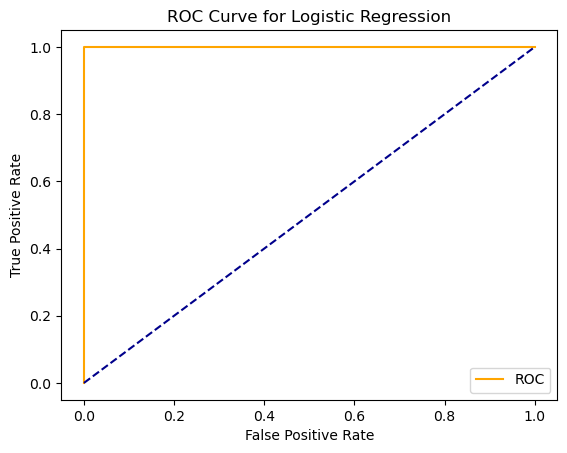

In [198]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

In [199]:
auc_score = roc_auc_score (y_test,y_pred)
print(auc_score)

1.0


## For DecisionTreeClassifier()

In [200]:
rc_dec = DecisionTreeClassifier(criterion='gini',min_samples_leaf= 1, min_samples_split=2,max_depth=16)
rc_dec.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=16)

In [201]:
print('Accuracy Score:',rc_dec.score(x_train, y_train))

Accuracy Score: 1.0


In [202]:
y_pred = rc_dec.predict(x_test)

In [203]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [204]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2. 1. 0.]
True Positive rate =  [0. 1. 1.]
False Positive rate =  [0. 0. 1.]


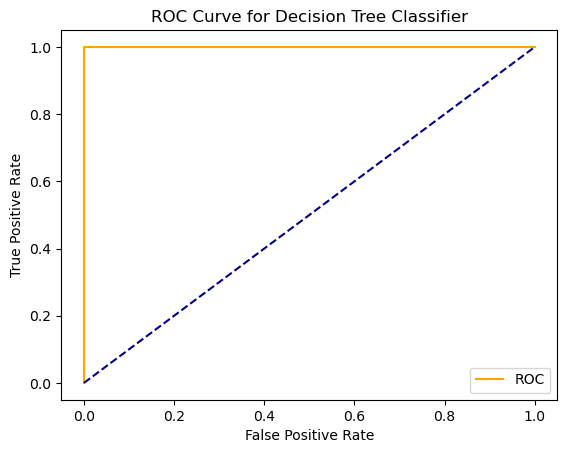

In [205]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend()
plt.show()

In [206]:
auc_score = roc_auc_score (y_test,y_pred)
print(auc_score)

1.0


## RandomForestClassifier()

In [207]:
rc_rf = RandomForestClassifier(n_estimators=450,criterion='gini',min_samples_split=3,max_depth=14)

In [208]:
rc_rf.fit(Features_scaled, Label)

RandomForestClassifier(max_depth=14, min_samples_split=3, n_estimators=450)

In [209]:
print('Accuracy Score:',rc_rf.score(Features_scaled,Label))

Accuracy Score: 1.0


In [210]:
y_pred = rc_rf.predict(x_test)

In [211]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [212]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2. 1. 0.]
True Positive rate =  [0. 1. 1.]
False Positive rate =  [0. 0. 1.]


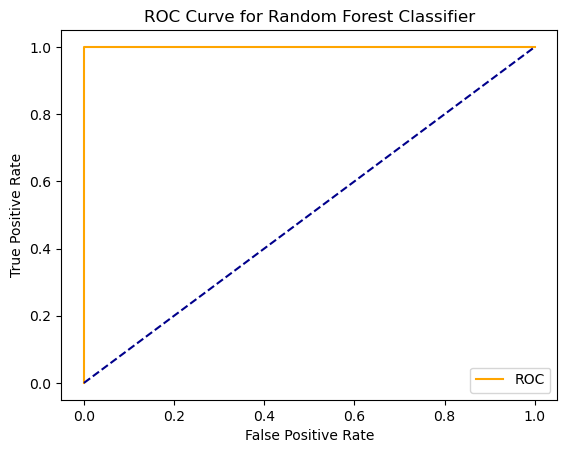

In [213]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.show()

In [214]:
auc_score = roc_auc_score (y_test,y_pred)
print(auc_score)

1.0


## KNeighborsClassifier()

In [215]:
rc_KN = KNeighborsClassifier(n_neighbors=3, leaf_size=25, p = 1, algorithm='auto', weights = 'distance')

In [216]:
rc_KN.fit(Features_scaled, Label)

KNeighborsClassifier(leaf_size=25, n_neighbors=3, p=1, weights='distance')

In [217]:
print('Accuracy Score:',rc_KN.score(Features_scaled,Label))

Accuracy Score: 1.0


In [218]:
y_pred = rc_KN.predict(x_test)

In [219]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [220]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2. 1. 0.]
True Positive rate =  [0. 1. 1.]
False Positive rate =  [0. 0. 1.]


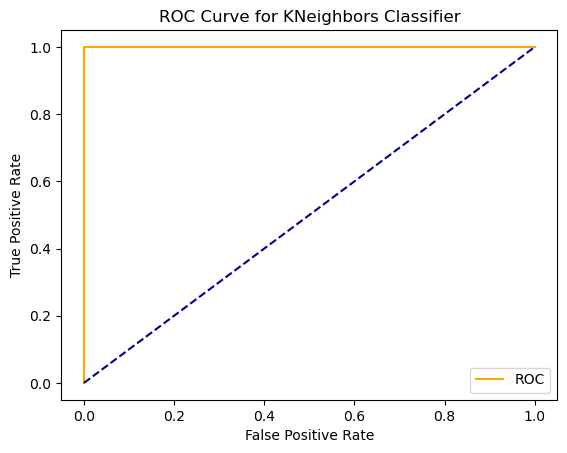

In [221]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNeighbors Classifier')
plt.legend()
plt.show()

In [222]:
auc_score = roc_auc_score (y_test,y_pred)
print(auc_score)

1.0


## SVC

In [223]:
rc_SVC = SVC(kernel='rbf',C=695, gamma=1)

In [224]:
rc_SVC.fit(Features_scaled, Label)

SVC(C=695, gamma=1)

In [225]:
print('Accuracy Score:',rc_SVC.score(Features_scaled,Label))

Accuracy Score: 1.0


In [226]:
y_pred = rc_SVC.predict(x_test)

In [227]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [228]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2. 1. 0.]
True Positive rate =  [0. 1. 1.]
False Positive rate =  [0. 0. 1.]


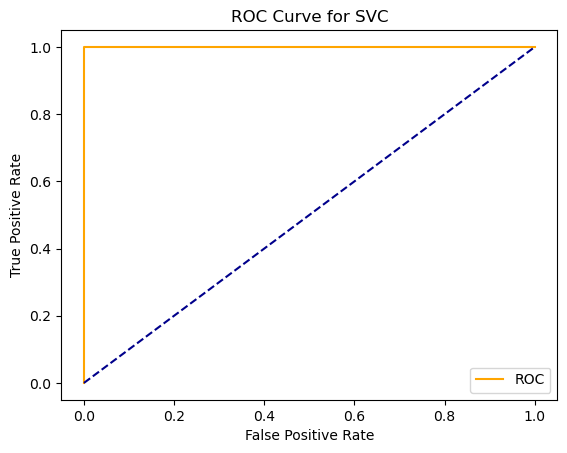

In [229]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC')
plt.legend()
plt.show()

In [230]:
auc_score = roc_auc_score (y_test,y_pred)
print(auc_score)

1.0


## GradientBoostingClassifier()

In [231]:
rc_gb = GradientBoostingClassifier(learning_rate=1)

In [232]:
rc_gb.fit(Features_scaled, Label)

GradientBoostingClassifier(learning_rate=1)

In [233]:
print('Accuracy Score:',rc_gb.score(Features_scaled,Label))

Accuracy Score: 1.0


In [234]:
y_pred = rc_gb.predict(x_test)

In [235]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [236]:
print ('Threshold =', thresholds)
print ('True Positive rate = ', tpr)
print ('False Positive rate = ', fpr)

Threshold = [2. 1. 0.]
True Positive rate =  [0. 1. 1.]
False Positive rate =  [0. 0. 1.]


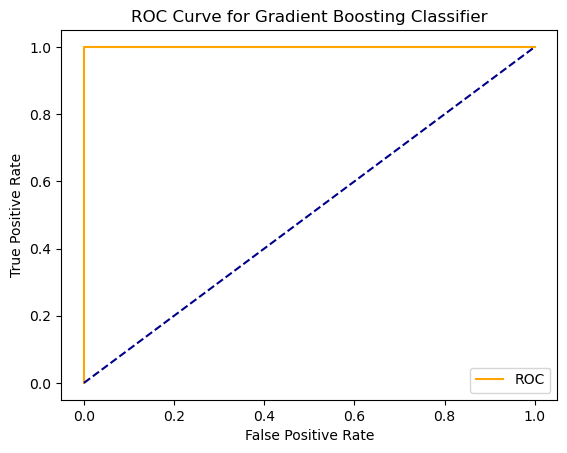

In [237]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color= 'darkblue', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gradient Boosting Classifier')
plt.legend()
plt.show()

In [238]:
auc_score = roc_auc_score (y_test,y_pred)
print(auc_score)

1.0


# Plotting ROC Curve for all models

In [239]:
from sklearn.metrics import plot_roc_curve

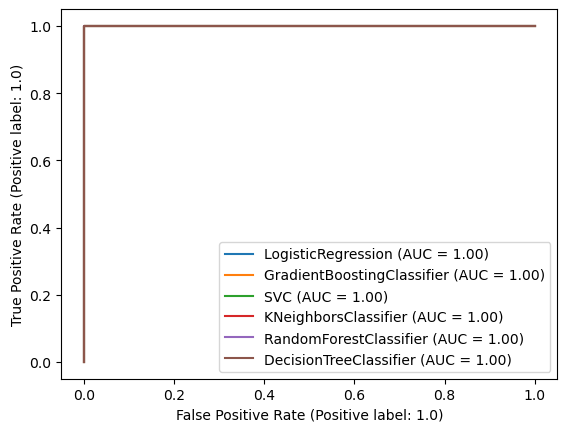

In [240]:
disp = plot_roc_curve (rc_reg, x_train, y_train)

plot_roc_curve (rc_gb, x_train, y_train, ax=disp.ax_) # ax_ = Axes with confusion matrix
plot_roc_curve (rc_SVC, x_train, y_train, ax=disp.ax_)
plot_roc_curve (rc_KN, x_train, y_train, ax=disp.ax_)
plot_roc_curve (rc_rf, x_train, y_train, ax=disp.ax_)
plot_roc_curve (rc_dec, x_train, y_train, ax=disp.ax_)
plt.legend (prop={'size' :10}, loc= 'lower right')
                  
plt.show()